In [2]:
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession

In [5]:
get_ipython().system('pip install pymysql')

In [6]:
import pymysql
conn = pymysql.connect(host='db', user='root', passwd='123', db='invest')
cursor = conn.cursor()
cursor.execute("select * from Perfil;")

38102

In [7]:
perfil_data=cursor.fetchall()

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Python Spark SQL basic example").config("spark.some.config.option", "some-value").getOrCreate()

In [86]:
df_perfil = spark.createDataFrame(perfil_data , ["dataId", "ClienteId", "Idade", "EstadoCivil", "BillingCity", "NivelConhecimentoAtual", "ScoreNivelConhecimento", "PerfilInvestidor", "RendaMensal", "ValorPatrimonio", "Pergunta1", "Resposta11", "Pergunta2", "Resposta21", "Pergunta3", "Resposta31", "Pergunta4", "Resposta41", "Pergunta5", "Resposta51", "Resposta52", "Resposta53", "Resposta54", "Resposta55", "Resposta56", "Resposta57", "Resposta58", "Pergunta6", "Resposta61", "Resposta62", "Resposta63", "Resposta64", "Resposta65", "Resposta66", "Resposta67", "Resposta68", "Pergunta7", "Resposta71", "Resposta72", "Resposta73", "Resposta74", "Resposta75", "Pergunta8", "Resposta81", "Pergunta9", "Resposta91", "ScoreRisco", "ScoreObjetivos", "ScoreSituacaoFinanceira", "Produto", "NomeDoProduto", "NomeEmissor", "TaxaCliente", "TaxaPreCliente", "DescricaoProduto", "ValorMinimoAplicaInicial", "ValorMinimoAplicacaoAdicional", "DataVencimento", "FamiliaCarteira", "ValorInvestidoAtual", "ValorRendimento", "Rentabilidade12Meses", "RentabilidadeMes", "RiscoAtivo", "Status", "ProdutoId"])

In [10]:
df_pandas_perfil = df_perfil.select("*").toPandas()

In [11]:
df_pandas_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38102 entries, 0 to 38101
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dataId                         38102 non-null  int64  
 1   ClienteId                      38102 non-null  object 
 2   Idade                          38102 non-null  int64  
 3   EstadoCivil                    38102 non-null  object 
 4   BillingCity                    38102 non-null  object 
 5   NivelConhecimentoAtual         38102 non-null  object 
 6   ScoreNivelConhecimento         38102 non-null  object 
 7   PerfilInvestidor               38102 non-null  int64  
 8   RendaMensal                    38102 non-null  float64
 9   ValorPatrimonio                38102 non-null  object 
 10  Pergunta1                      38102 non-null  object 
 11  Resposta11                     38102 non-null  object 
 12  Pergunta2                      38102 non-null 

In [100]:
df_produtos = df_pandas_perfil[['ProdutoId', 'NomeDoProduto', 'NomeEmissor', 'TaxaCliente', 'TaxaPreCliente', 'DescricaoProduto', 'ValorMinimoAplicaInicial', 'ValorMinimoAplicacaoAdicional', 'DataVencimento', 'FamiliaCarteira', 'ValorInvestidoAtual', 'ValorRendimento', 'Rentabilidade12Meses', 'RentabilidadeMes', 'RiscoAtivo' ]]

In [101]:
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38102 entries, 0 to 38101
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ProdutoId                      38102 non-null  object
 1   NomeDoProduto                  38102 non-null  object
 2   NomeEmissor                    38102 non-null  object
 3   TaxaCliente                    38102 non-null  object
 4   TaxaPreCliente                 38102 non-null  object
 5   DescricaoProduto               38102 non-null  object
 6   ValorMinimoAplicaInicial       38102 non-null  object
 7   ValorMinimoAplicacaoAdicional  38102 non-null  object
 8   DataVencimento                 38102 non-null  object
 9   FamiliaCarteira                38102 non-null  object
 10  ValorInvestidoAtual            38102 non-null  object
 11  ValorRendimento                38102 non-null  object
 12  Rentabilidade12Meses           38102 non-null  object
 13  R

In [102]:
df_produtos = df_produtos[~df_produtos['ProdutoId'].duplicated()]

In [103]:
df_produtos.dtypes

ProdutoId                        object
NomeDoProduto                    object
NomeEmissor                      object
TaxaCliente                      object
TaxaPreCliente                   object
DescricaoProduto                 object
ValorMinimoAplicaInicial         object
ValorMinimoAplicacaoAdicional    object
DataVencimento                   object
FamiliaCarteira                  object
ValorInvestidoAtual              object
ValorRendimento                  object
Rentabilidade12Meses             object
RentabilidadeMes                 object
RiscoAtivo                       object
dtype: object

In [104]:
df_produtos[['TaxaCliente', 'TaxaPreCliente', 'ValorMinimoAplicaInicial', 'ValorMinimoAplicacaoAdicional', 'ValorInvestidoAtual', 'ValorRendimento', 'Rentabilidade12Meses', 'RentabilidadeMes', 'RiscoAtivo']] = df_produtos[['TaxaCliente', 'TaxaPreCliente', 'ValorMinimoAplicaInicial', 'ValorMinimoAplicacaoAdicional', 'ValorInvestidoAtual', 'ValorRendimento', 'Rentabilidade12Meses', 'RentabilidadeMes', 'RiscoAtivo']].apply(pd.to_numeric) 

In [105]:
df_produtos.dtypes

ProdutoId                         object
NomeDoProduto                     object
NomeEmissor                       object
TaxaCliente                      float64
TaxaPreCliente                   float64
DescricaoProduto                  object
ValorMinimoAplicaInicial         float64
ValorMinimoAplicacaoAdicional    float64
DataVencimento                    object
FamiliaCarteira                   object
ValorInvestidoAtual              float64
ValorRendimento                  float64
Rentabilidade12Meses             float64
RentabilidadeMes                 float64
RiscoAtivo                       float64
dtype: object

In [106]:
df_produtos.describe()

,TaxaCliente,TaxaPreCliente,ValorMinimoAplicaInicial,ValorMinimoAplicacaoAdicional,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo
count,598.000000,599.000000,216.000000,238.000000,837.000000,577.000000,237.000000,237.000000,836.000000
mean,81.567726,1.999349,6055.787037,2400.231218,14486.635245,387.874766,24.298269,1.553866,3.348086
std,46.792038,3.349295,8164.820244,3341.675436,32247.416054,1090.425421,41.191719,2.720649,1.464022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.845922,0.000000
25%,90.000000,0.000000,1000.000000,500.000000,1000.000000,25.380000,6.953877,0.062405,2.000000
50%,100.000000,0.000000,5000.000000,1000.000000,5000.000000,74.490000,13.122921,0.603510,3.000000
75%,114.812500,4.015000,5000.000000,5000.000000,11000.000000,263.070000,35.133506,2.244562,5.000000
max,140.000000,12.000000,50000.000000,30000.000000,500000.000000,9848.420000,584.324863,17.413157,5.000000


In [82]:
df_produtos.head(n=10)

,ProdutoId,NomeDoProduto,NomeEmissor,TaxaCliente,TaxaPreCliente,DescricaoProduto,ValorMinimoAplicaInicial,ValorMinimoAplicacaoAdicional,DataVencimento,FamiliaCarteira,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo
0,a0W6A000009GZdgUAG,PI SELIC RF SIMPLES FI,,,,PI TESOURO SELIC RF SIMPLES FI,,30.0,,Renda Fixa,30.0,,0.0,0.37005375,1.0
8,a0W6A000009R6mvUAC,JOJO WACHSMANN - VITREO,,,,JOJO WACHSMANN - VITREO,1000.0,100.0,,Renda Fixa,1000.0,,0.0,0.84967302,4.0
9,a0W6A000008FwYQUA0,SAM JURO REAL RF FIC FI,,,,SAM JURO REAL RF FIC FI,30.0,30.0,,Renda Fixa,30.0,,11.533339100000001,-0.12585484,3.0
10,a0W6A000009L0FgUAK,RENATO SANTANIELLO - SANTANDER PRIVATE,,,,DANE-SE A IDADE MINIMA-SANTANDER PRIVATE,30.0,30.0,,Renda Fixa,30.0,,0.0,0.20211567,4.0
19,a0W6A000009IJjgUAG,SAM RENDA FIXA LONGO PRAZO FIC FI,,,,SAM RENDA FIXA LONGO PRAZO FIC FI,30.0,30.0,,Renda Fixa,30.0,,6.775836,0.03358966,3.0
32,a0W6A000009Ky7bUAC,FABIO PASSOS - CA INDOSUEZ,,,,EDUCAÃ‡ÃƒO SEM SUFOCO-CA INDOSUEZ,1000.0,1000.0,,Renda Fixa,1000.0,,0.0,2.39431039,4.0
34,a0W6A000009KycOUAS,DAN KAWA - TAG INVESTIMENTOS,,,,INDEPENDÃŠNCIA SEM SOFRÃŠNCIA-TAG,100.0,100.0,,Renda Fixa,200.0,,0.0,0.59481645,4.0
35,a0W3u00000AdOBNEA3,BERNARDO S. DA ICATU - DATA ALVO 2030,,,,BERNARDO S. DA ICATU - DATA ALVO 2030,500.0,500.0,,Renda Fixa,500.0,,18.02180756,-0.00815174,3.0
37,a0W6A00000Aa9rKUAR,CDB,PARANA BANCO S.A.,101.0,0.0,CDB POS,,,2020-08-05,,1000.0,2.48,,,1.0
41,a0W3u00000AdL5wEAF,LCA,BANCO PINE S.A.,102.0,0.0,LCA PÃ“S 1,,,2020-05-15,,1000.0,18.79,,,2.0


In [119]:
df_produtos["FamiliaCarteira"] = df_produtos["FamiliaCarteira"].astype('category')
df_produtos["FamiliaCarteira"].unique()

[Renda Fixa, , Renda VariÃ¡vel]
Categories (3, object): [Renda Fixa, , Renda VariÃ¡vel]

In [109]:
df_produtos.isna().sum()

ProdutoId                          0
NomeDoProduto                      0
NomeEmissor                        0
TaxaCliente                      240
TaxaPreCliente                   239
DescricaoProduto                   0
ValorMinimoAplicaInicial         622
ValorMinimoAplicacaoAdicional    600
DataVencimento                     0
FamiliaCarteira                    0
ValorInvestidoAtual                1
ValorRendimento                  261
Rentabilidade12Meses             601
RentabilidadeMes                 601
RiscoAtivo                         2
dtype: int64

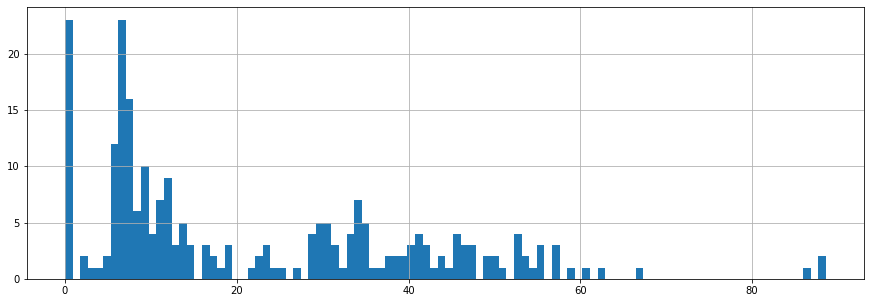

In [132]:
plt.figure(figsize=(15,5))
df_produtos = df_produtos[df_produtos['Rentabilidade12Meses'] < 300]
df_produtos['Rentabilidade12Meses'].hist(bins = 100)

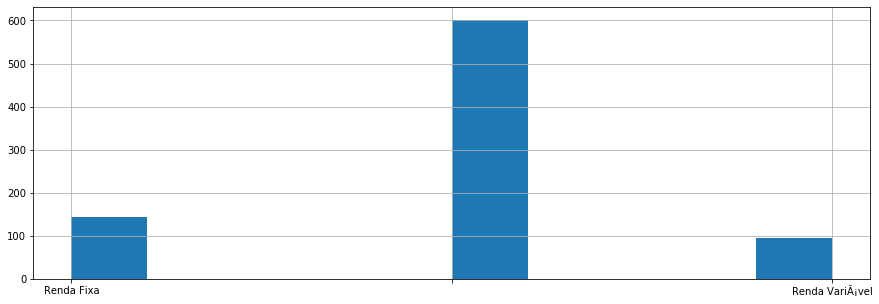

In [113]:
plt.figure(figsize=(15,5))
df_produtos['FamiliaCarteira'].hist()

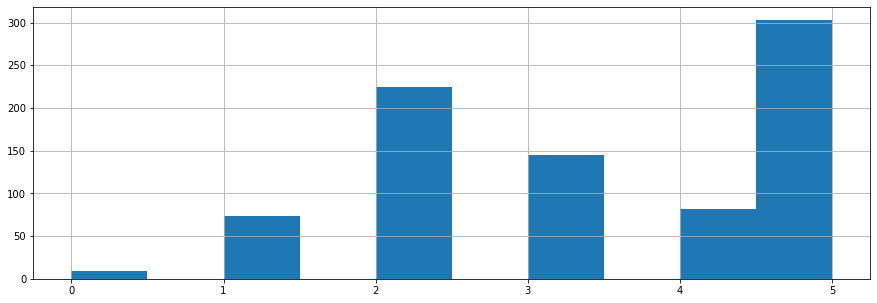

In [114]:
plt.figure(figsize=(15,5))
df_produtos['RiscoAtivo'].hist()

In [122]:
df_produtos[df_produtos["FamiliaCarteira"] == "Renda VariÃ¡vel"].head(100)

,ProdutoId,NomeDoProduto,NomeEmissor,TaxaCliente,TaxaPreCliente,DescricaoProduto,ValorMinimoAplicaInicial,ValorMinimoAplicacaoAdicional,DataVencimento,FamiliaCarteira,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo
56,a0W3u000009PBlwEAG,TRIGONO FLAGSHIP SMALL CAPS FIC FIA,,NaN,NaN,TRIGONO FLAGSHIP SMALL CAPS FIC FIA,1000.0,1000.0,,Renda VariÃ¡vel,1000.00,NaN,45.641376,3.048314,5.0
57,a0W3u000009PCrtEAG,BOGARI VALUE D FIC FIA,,NaN,NaN,,1000.0,1000.0,,Renda VariÃ¡vel,1200.00,NaN,41.704108,2.036640,5.0
82,a0W6A000005fMbsUAE,ALASKA BLACK FIC FIA II - BDR NÃVEL I,,NaN,NaN,ALASKA BLACK FIC FIA II - BDR NÃVEL I,1000.0,1000.0,,Renda VariÃ¡vel,1500.00,NaN,53.099388,9.592621,5.0
98,a0W6A00000A1YLYUA3,SUL AMÃ‰RICA FV FIA,,NaN,NaN,,NaN,2500.0,,Renda VariÃ¡vel,3500.00,NaN,55.462332,2.188378,5.0
161,a0W3u00000AdLQ6EAN,NEST FIA,,NaN,NaN,NEST FIA,1000.0,500.0,,Renda VariÃ¡vel,3000.00,NaN,22.882936,2.060221,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26802,a0W6A00000AcB8eUAF,PACIFICO AÃ‡Ã•ES FIC FIA,,NaN,NaN,PACIFICO AÃ‡Ã•ES FIC FIA,10000.0,5000.0,,Renda VariÃ¡vel,10000.00,NaN,34.617067,0.719274,5.0
26842,a0W3u00000CWH7VEAX,TRAFALGAR ROYAL LONG BIAS LATAM FIC FIA,,NaN,NaN,TRAFALGAR ROYAL LONG BIAS LATAM FIC FIA,20000.0,2000.0,,Renda VariÃ¡vel,20000.00,NaN,30.209548,2.893173,5.0
32434,a0W3u00000CWKgLEAX,BRADESCO ASSET FIC FIA CRESCIMENTO,,NaN,NaN,BRADESCO ASSET FIC FIA CRESCIMENTO,5000.0,500.0,,Renda VariÃ¡vel,512.56,NaN,0.000000,10.421194,5.0
33900,a0W3u00000AdGGlEAN,AZ QUEST SMALL MID CAPS FIC FIA,,NaN,NaN,AZ QUEST SMALL MID CAPS FIC FIA,10000.0,5000.0,,Renda VariÃ¡vel,10000.00,NaN,50.266727,1.621242,5.0


In [129]:
df_produtos[(df_produtos["RiscoAtivo"] == 5) & (df_produtos["FamiliaCarteira"] == "Renda Fixa")].head(100)

,ProdutoId,NomeDoProduto,NomeEmissor,TaxaCliente,TaxaPreCliente,DescricaoProduto,ValorMinimoAplicaInicial,ValorMinimoAplicacaoAdicional,DataVencimento,FamiliaCarteira,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo
492,a0W6A00000Aa4IiUAJ,GROU ABSOLUTO FIC FIM,,NaN,NaN,GROU ABSOLUTO FIC FIM,5000.0,5000.0,,Renda Fixa,10000.00,NaN,34.093565,4.453871,5.0
646,a0W6A00000A4zhSUAR,OPPORTUNITY TOTAL FIC FIM,,NaN,NaN,OPPORTUNITY TOTAL FIC FIM,10000.0,5000.0,,Renda Fixa,100000.00,NaN,12.963736,0.472275,5.0
655,a0W3u00000AdGdREAV,ICATU VANGUARDA FIRF INFLAÃ‡ÃƒO CP LP,,NaN,NaN,ICATU VANGUARDA FIRF INFLAÃ‡ÃƒO CP LP,500.0,500.0,,Renda Fixa,1500.00,NaN,14.473458,0.032200,5.0
704,a0W6A00000AK1QGUA1,EXPLORITAS ALPHA AMERICA LATINA FIC FIM,,NaN,NaN,EXPLORITAS ALPHA AMERICA LATINA FIC FIM,10000.0,5000.0,,Renda Fixa,10000.00,NaN,3.782150,1.507499,5.0
717,a0W6A00000AcuL0UAJ,PACIFICO LB FIC FIM,,NaN,NaN,PACIFICO LB FIC FIM,10000.0,5000.0,,Renda Fixa,50000.00,NaN,30.497160,6.075090,5.0
731,a0W3u00000AdHaWEAV,SAFARI 45 FIC FIM II,,NaN,NaN,SAFARI 45 FIC FIM II,5000.0,1000.0,,Renda Fixa,5000.00,NaN,0.000000,1.057180,5.0
1204,a0W3u00000AdDrzEAF,GARDE ATHOS LONG BIASED FIC FIM,,NaN,NaN,GARDE ATHOS LONG BIASED FIC FIM,20000.0,5000.0,,Renda Fixa,50000.00,NaN,0.000000,2.007039,5.0
1259,a0W3u00000AdEYCEA3,NAVI LONG BIASED FIC FIM,,NaN,NaN,NAVI LONG BIASED FIC FIM,5000.0,5000.0,,Renda Fixa,30000.00,NaN,27.448476,0.211315,5.0
1445,a0W6A00000AYzKYUA1,OCCAM RETORNO ABSOLUTO FIC FIM,,NaN,NaN,OCCAM RETORNO ABSOLUTO FIC FIM,10000.0,1.0,,Renda Fixa,24000.00,NaN,18.819219,1.110142,5.0
2560,a0W3u00000CWQPsEAP,LOGOS TOTAL RETURN FIC FIM,,NaN,NaN,LOGOS TOTAL RETURN FIC FIM,10000.0,1000.0,,Renda Fixa,10000.00,NaN,584.324863,0.051538,5.0
